
# Predicting BMW Used Car Price 

## Part I: Load and Clean 

This project will use Supervised Machine Learning to predict the price of a used BMW car.
Part I of this project will load and inspect data. They will also be cleaned and transformed into a suitable format for our analysis.

The project will follow the below:

- Read data
- Data validation and profiling
- Data transformation
- Exploratory data analysis

Functions were created to automate the above tasks.

## Read Data

The data in csv format will be read in pandas dataframe but first let us import the libraries and modules to use in accomplishing the above mentioned tasks.

### import dependencies

In [1]:
# import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import custom modules
import funcs
import mlfuncs
import plots
import utils

In [3]:
# specify data path
data_path = 'data/bmw.csv'

In [4]:
# read and qa data
df, df_null = funcs.read_and_qa(data_path)

Checking for duplicate rows in the dataframe...
Dropping duplicate rows in dataframe.
There are 9 columns and 10664 records in the dataframe.
Extracting count and percentages of nulls and non nulls


Let's check for nulls in data

In [5]:
# plot count of nulls
plots.plot_qa(df_null)

There are zero nulls in the DataFrame.
No plot to display!


The does not contain null values.

We shall now proceed to inspect the data.

In [6]:
# check head of data
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [7]:
# describe numerical features
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000
mean,2017.062828,22692.888691,25710.978995,131.597431,56.483121,2.170161
std,2.350668,11434.921030,25146.634940,61.611394,31.465604,0.552556
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14897.000000,5665.750000,135.000000,45.600000,2.000000
50%,2017.000000,20261.500000,18783.000000,145.000000,53.300000,2.000000
75%,2019.000000,27890.000000,38436.500000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [8]:
# describe categorical features
df.describe(exclude='number')

,model,transmission,fuelType
count,10664,10664,10664
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2434,4637,6988


In [9]:
# inspect to check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10664 entries, 0 to 10663
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10664 non-null  object 
 1   year          10664 non-null  int64  
 2   price         10664 non-null  int64  
 3   transmission  10664 non-null  object 
 4   mileage       10664 non-null  int64  
 5   fuelType      10664 non-null  object 
 6   tax           10664 non-null  int64  
 7   mpg           10664 non-null  float64
 8   engineSize    10664 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 749.9+ KB


We shall also look at count of unique values in data.

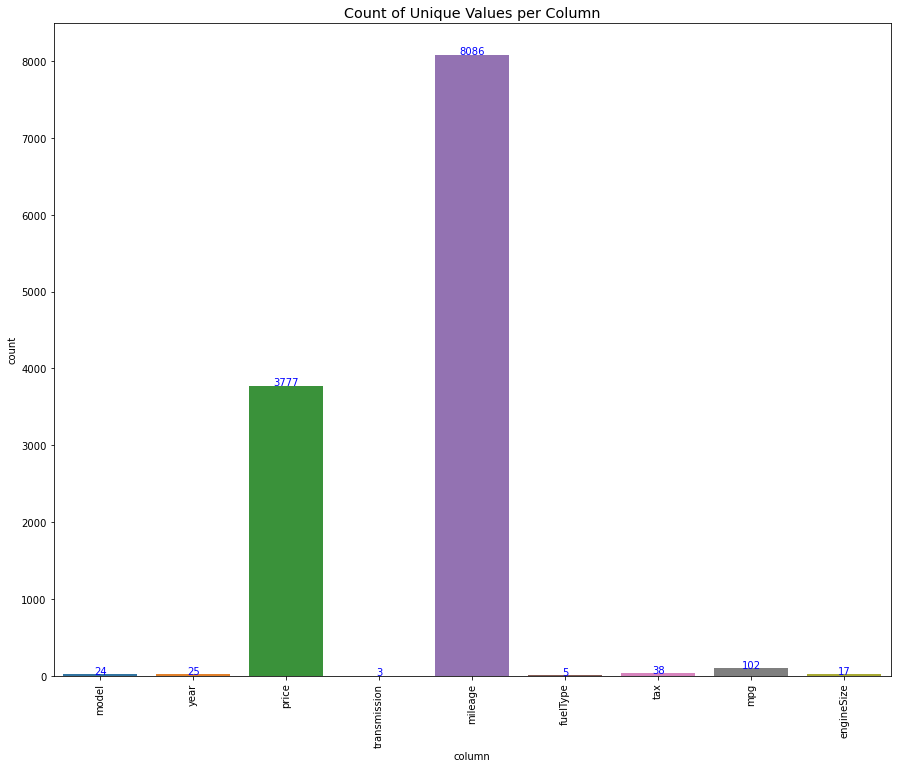

In [10]:
# plot unique value counts
plots.plot_unique_vals_count(df)

Our focus is more on the categorical features when deciding to create the above plot as it displays the count of unique values. We can tell that there are 24 unique bmw models, 5 distinct fuel types and, 3 distinct transmission categories. Also, the describe cells give us an idea of the time period being analyzed (1996 - 2020) and summary statistics of numerical features. For example, we can tell the max price in this dataset is 123,456.00 USD while the average is $22,692.88 USD.

## Clean and transform data

Having profiled the data, we shall now clean and transform it into a suitable format for exploratory analysis and then later for machine learning. A copy of the clean and transformed data is saved in csv format for subsequent analysis.

For the cleaning aspect, leading and trailing spaces were stripped from model values while the only transformation conducted was to extract age or number of years of the car as it makes more sense to interprete age.

In [11]:
# clean, transform and save clean data
df_cln = funcs.bmw_data_clean(df)

## Exploratory Data Analysis

In this section, we will look at trends and try to extract insights in the data by analyzing the following:

- Time Series of Price against variables like transmission, fueltype and model
- Distribution of Price
- Correlation of features

### How has price changed over time?

First, let's observe how price has changed over time for all bmw models.

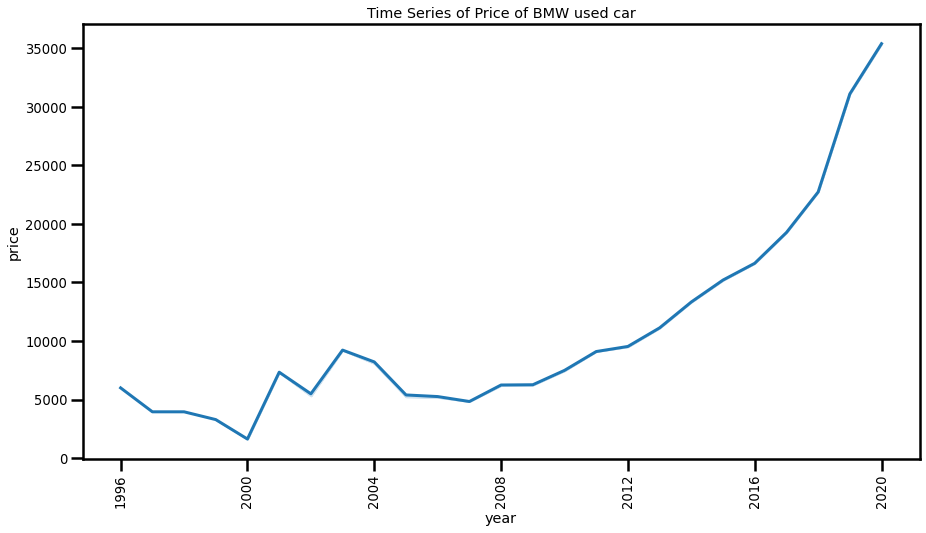

In [12]:
plots.line_plot(df_cln, 'year', 'price')

Initially, we can see prices plummet from around 1996 to 2000. The gradual increase is obeserved from 2000 to 2005 when they slightly dropped again and plateaued until 2006. This trend change right after with a yearly increase on to 2020.

Before moving on to analyzing model trends, we will look at how prices have also changed for fuel typ and transmission.

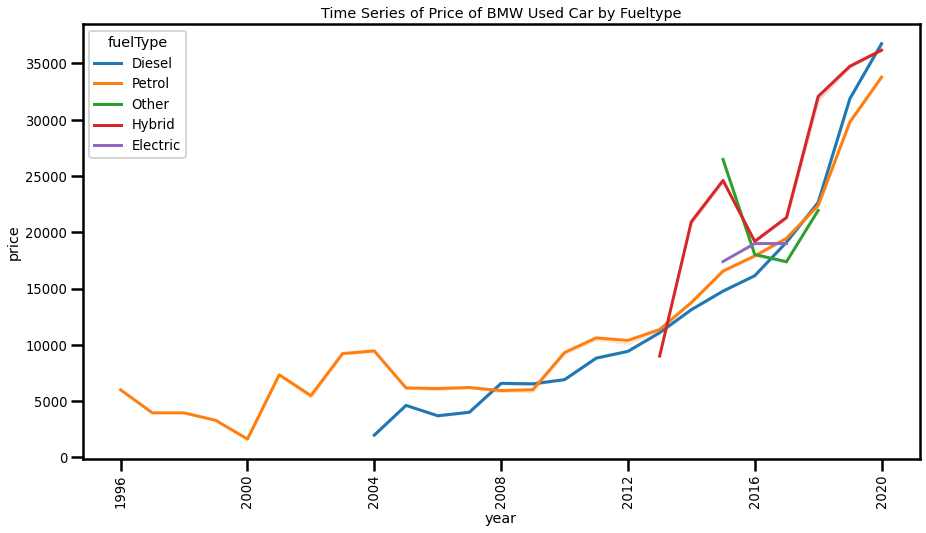

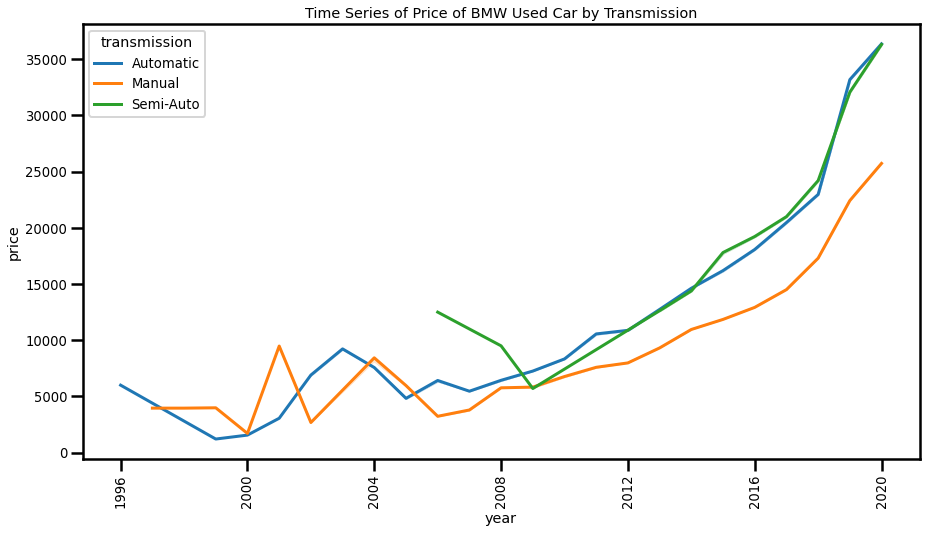

In [13]:
# plot time series for fule type and transmission
cols = ['fuelType', 'transmission']
for col in cols:
    plots.line_plot(df_cln, 'year', 'price', hue = col)

We can that prices have increased over time for tthe two variables plotted above. Trends worth mentioning are observed in the electric, hybrid and other fuel type. These types came into the market in recent years starting with hybrid around 2013 while electric and other came few years after that in 2015.

Also, for transmission types, we can tell semi-auto was introduced around 2006 and has also enjoyed similar growth compared to manual and automatic.

We would also like to see how the models rank over the years. We will rank models with respect to Median Price as seen in the cell below.

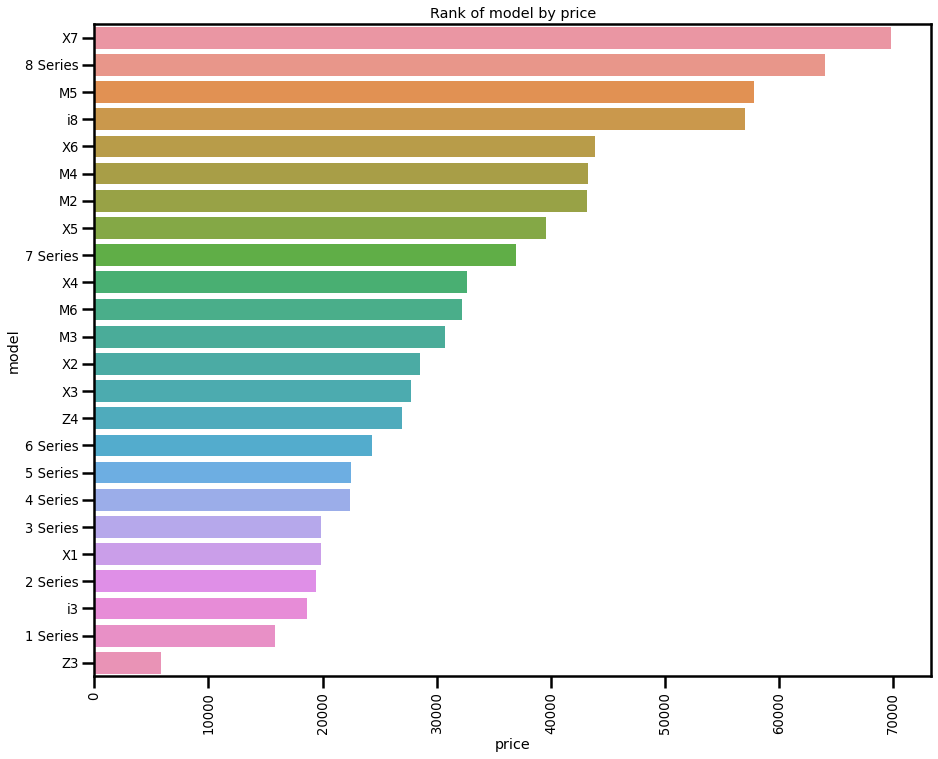

In [14]:
# plot rank of model by price
plots.rank_feature(df_cln, 'model', 'price')

**X7** is the most expensive car when comparing average price over the years.

Next stop in our exploratory analysis is to look at the distribution of price.

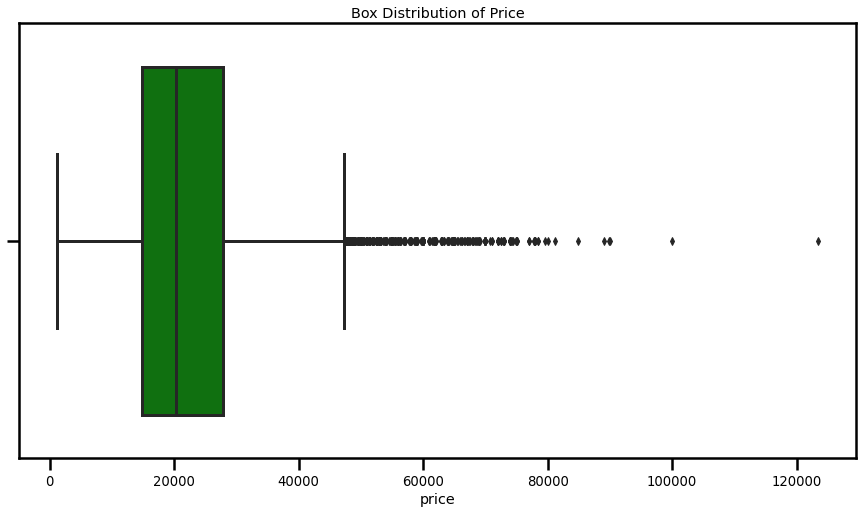

In [15]:
# box plot with outliers
plots.box_plot(df_cln, 'price')

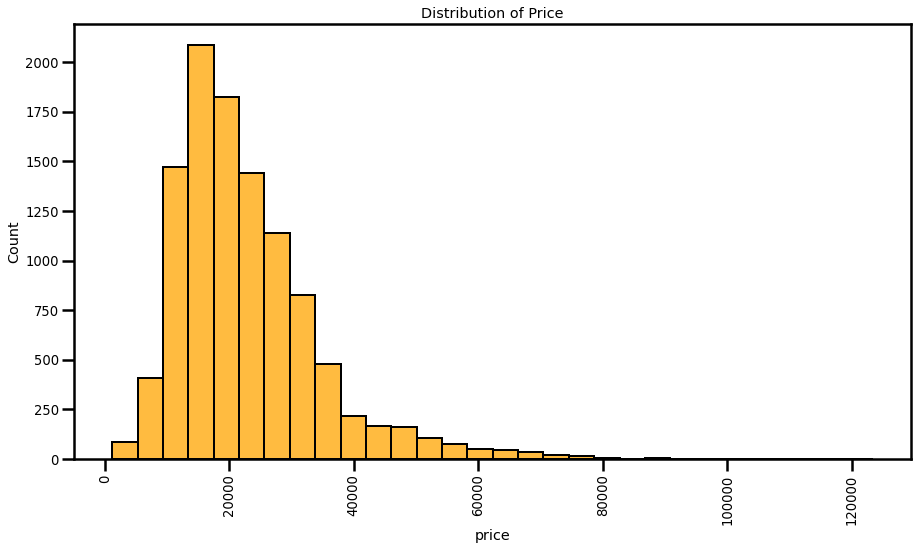

In [16]:
# plot histogram of price
plots.hist_distribution(df_cln, 'price', bins = 30, kde = False)

The boxplot shows the distribution of price with clear distinguishable outliers while the histogram confirms the skew wherein  bulk of the data lie on the left.

The distribution is further made more granular to show the distribution and outliers per model. We can tell an extreme outlier in 2 Series model is the most expensive car in the dataset.

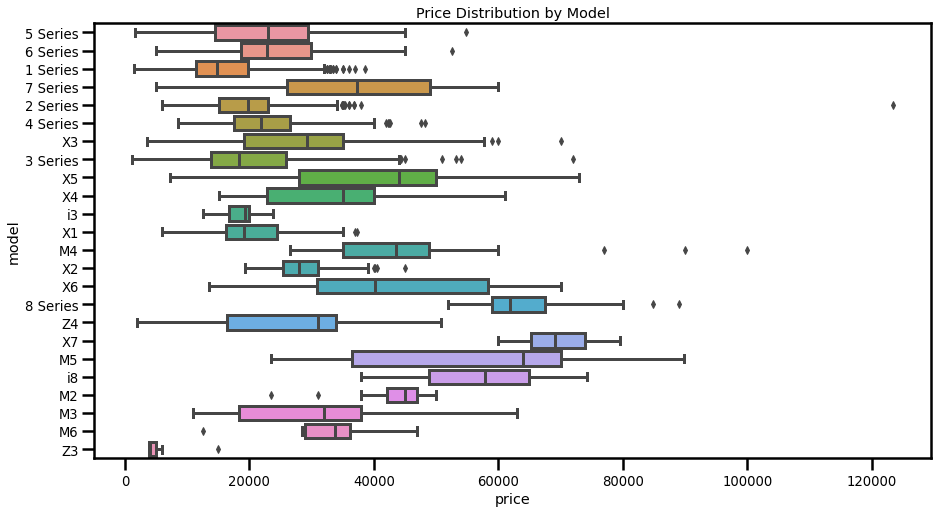

In [17]:
# plot distribution of price by model
plots.box_plot(df_cln, 'price', 'model')

Another plot worth including in our analysis is to look at relationship between variables. We will employ a correlation heatmap to observe this relationship with goal of identifying highly correlated features to drop during our machine learning analysis.

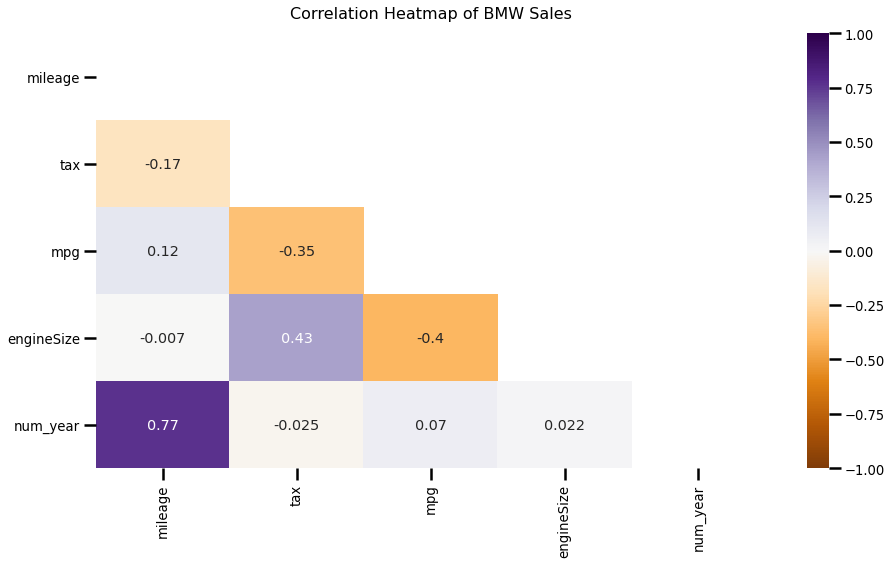

In [18]:
# plot correlation heatmap
plots.corr_heatmap(df_cln, cols_drop = ['price', 'year'])

The correlation values show that there is not a significant relationship between variables with the exception of number of years and mileage which confirms increase in mileage with increase in years. Even though it is a strong positive relationship, it is not enough to say the two feature are highly correlated and we should not have to be concerned about multi-collinearlity.

## Part II: Machine Learning

This part will try to use supervised machine learning to answer the main ask of the project - Predict **Price of BMW Used cars**. 

The following approach is employed to accomplish this:

- Data Preprocessing
- Develop and train multiple Regression models
- Perform hyperparameter tuning for the best model
- Extract feature importances

Like in previous part, all functions for full machine learning implementation are found in **mlfuncs.py**.

#### Data Preprocessing

The preprocessing step involves:

- Dropping unnecessary columns, in our case year was dropped as the same information is found in num_year
- Split data into train and test set
- Scale and standardize numerical features using StandardScaler
- Transform categorical values into OneHotEncoded columns
- Create a pipeline with all the above steps combined

#### Train multiple Regression Models

- Six regression models were trained including SGDRegressor, Ridge, Lasso, ElasticNet, DecisionTreeRegressor and RandomForestRegressor.

Let's proceed to perform the above outlined steps.

In [19]:
# import machine learning libraries


Creating pipeline for SGDRegressor.
Fitting training data to pipeline for SGDRegressor.
Predicting test values for SGDRegressor.
Calculating accuracy score for SGDRegressor.
Accuracy Score for SGDRegressor: 0.8543769552324433
Creating pipeline for Ridge.
Fitting training data to pipeline for Ridge.
Predicting test values for Ridge.
Calculating accuracy score for Ridge.
Accuracy Score for Ridge: 0.8647180512630551
Creating pipeline for Lasso.
Fitting training data to pipeline for Lasso.
Predicting test values for Lasso.
Calculating accuracy score for Lasso.
Accuracy Score for Lasso: 0.8662200788953134
Creating pipeline for ElasticNet.
Fitting training data to pipeline for ElasticNet.
Predicting test values for ElasticNet.
Calculating accuracy score for ElasticNet.
Accuracy Score for ElasticNet: 0.6734974263335791
Creating pipeline for DecisionTreeRegressor.
Fitting training data to pipeline for DecisionTreeRegressor.
Predicting test values for DecisionTreeRegressor.
Calculating accuracy

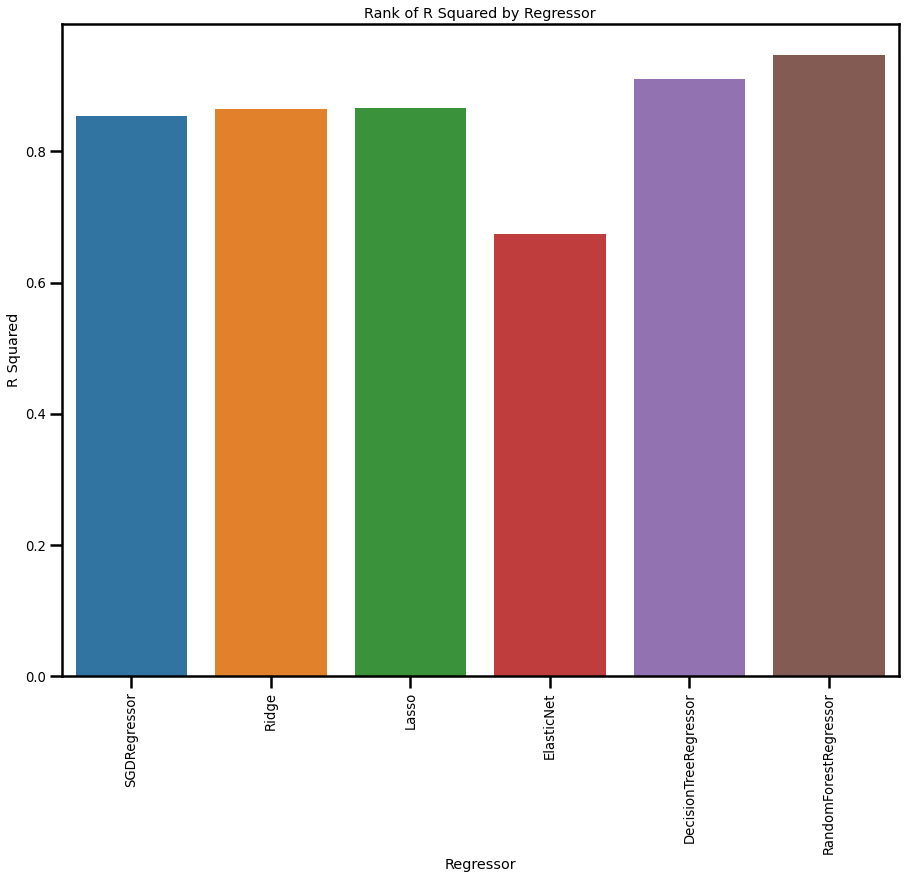

In [20]:
# train the models
best_regressor = mlfuncs.run_multi_models(df_cln)

The best regressor from the above plot is RandomForestRegressor with an approximate accuracy (R Squared) of 0.95, signifying our model is able to account for 95% of the variations in the data. Pretty good, huh!!

#### Tune Hyperparameters of Best Regressor

Let's see if we can improve the accuracy by performing hyperparamer tuning as observed below.

Hyperparameter Tuning for the Best Regressor: RandomForestRegressor
Creating pipeline for RandomForestRegressor.
Best parameters after GridSearchCV:
 {'randomforestregressor__max_depth': 22, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 6}
Best score after GridSearchCV:
 0.95


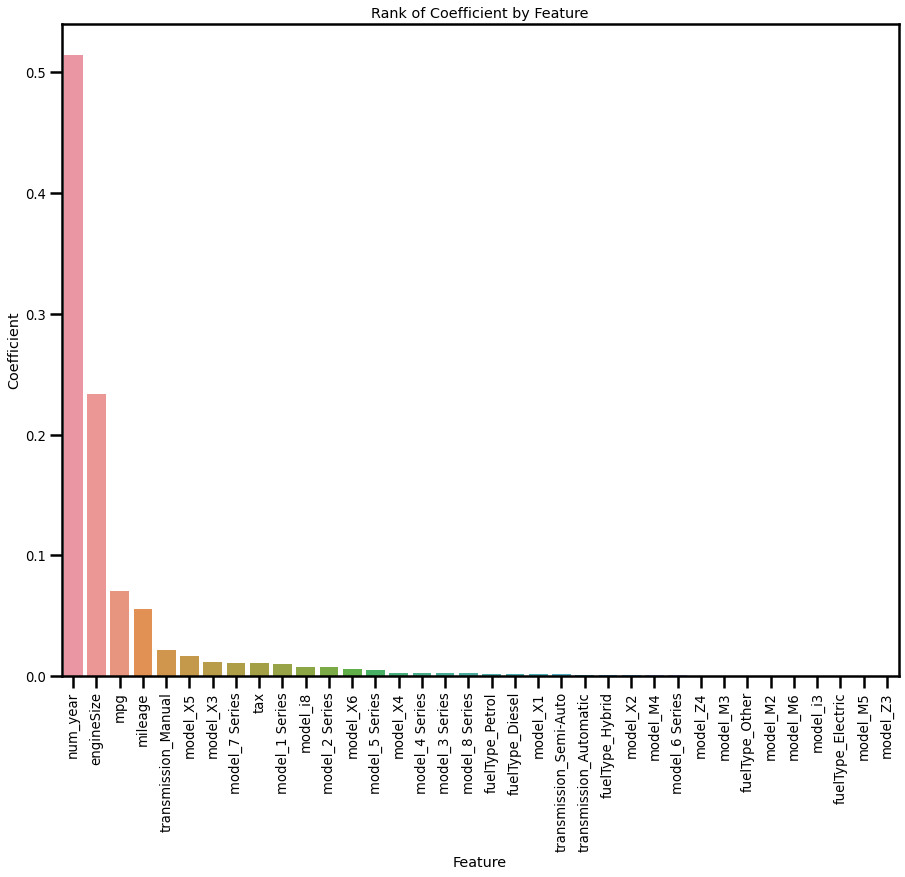

In [25]:
# tune hyperparameters of best model
GridSearchCV_model_output = mlfuncs.best_regressor_hyperparameter(df_cln, best_regressor)

There is no apparent model improvement after hyperparameter tuning with GridSearchCV. 

#### Extract Feature Importances

We were able to extract the feature importances after the model was fit to the training data as seen in the chart above. The output aligns with our assumption that age of the car, engine size and gas consumption will be among the top ranked features to influence the price of a used bmw car.

We will save the model ina pickled file to be later used for deployment in an interactive User Interface.

In [26]:
# dump pickled best estimator from hyperparameter tuning
model_dump = mlfuncs.dump_estimator(GridSearchCV_model_output, best_regressor)

TypeError: tuple indices must be integers or slices, not str

In [32]:
grid_list = list(GridSearchCV_model_output)
grid_list[0]['best_regressor_grid_object']

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['model', 'transmission',
                                                   'fuelType']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                

In [35]:
def dump_estimator(GridSearchCV_model_output):
    import sklearn.externals
    import joblib
    grid_list = list(GridSearchCV_model_output)
    best_estimator = grid_list[0]['best_regressor_grid_object']
    model = joblib.dump(best_estimator, 'models/best_regressor_dump.pkl')
    
    return model

In [36]:
model = dump_estimator(GridSearchCV_model_output)